# A first simple model

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

In [3]:
df_merged = pd.read_csv("../data/chlamydia_cdc_census.csv")
df_merged.drop("Cases", axis=1, inplace=True)
df_merged.head()

,FIPS,Population,hd01s001,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,...,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029
0,1001,55246,4.736962,21.8,7.9,5.6,5.8,6.1,7.6,7.5,...,2.68,3.13,75.4,24.6,52475,0.562138,0.003017,0.020029,0.002868,0.017704
1,1003,195540,5.260703,19.0,6.4,5.2,5.6,5.9,6.3,6.6,...,2.46,2.93,72.5,27.5,50183,0.545409,0.002747,0.023886,0.003444,0.020292
2,1005,27076,4.438653,18.0,6.3,6.5,7.3,6.6,6.6,6.6,...,2.47,3.01,66.8,33.2,35634,0.437169,0.002342,0.019348,0.003666,0.022200
3,1007,22512,4.360120,18.4,6.7,6.5,7.0,7.2,7.6,7.1,...,2.60,3.09,75.6,24.4,37984,0.524582,0.001886,0.020244,0.002012,0.020370
4,1009,57872,4.758321,20.2,7.0,5.4,6.0,6.0,6.8,7.0,...,2.63,3.07,80.6,19.4,44409,0.606034,0.001946,0.017981,0.003707,0.013440


In [4]:
df_zipfips= pd.read_csv("../data/ZIP_COUNTY_122014.csv", usecols={0,1})

In [5]:
zip2fips = dict(zip(df_zipfips["ZIP"], df_zipfips["COUNTY"]))

In [6]:
fips = zip2fips[10027]

In [7]:
target = df_merged[df_merged['FIPS']==fips]
target.shape

(1, 45)

In [8]:
target_params = target.values[0]

In [9]:
model = pickle.load(open('../data/randomforest_params.pickle', "rb" ))

In [10]:
model2 = pickle.load(open('../data/gradientboosting_params.pickle', "rb" ))

In [11]:
Ymean = pickle.load(open('../data/Ymean.pickle', "rb"))

In [12]:
Ystd = pickle.load(open('../data/Ystd.pickle', "rb"))

In [13]:
chlamydia_rate = model.predict(target_params[1:])

/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [14]:
gender_rate = {}
gender_factor = {}
gender_number = {}
gender_rate["Male"] = 278.4e-5
gender_rate["Female"] = 627.2e-5
gender_number["Male"] = 155651602
gender_number["Female"] = 160477237
rate_average = (gender_rate["Male"]*gender_number["Male"]+gender_rate["Female"]*gender_number["Male"])/(gender_number["Male"]+gender_number["Female"])
gender_factor["Male"] = gender_rate["Male"]/rate_average
gender_factor["Female"] = gender_rate["Female"]/rate_average
gender_factor["Female"], gender_factor["Male"]
race_rate = {}
race_factor = {}
race_number = {}
race_number["Native"] = 1942876.0
race_number["Asian"] = 12721721.0
race_number["Black"] = 29489649.0
race_number["Hispanic"] = 46407173.0
race_number["Multiple"] = 5145135.0
race_number["Pacific"] = 473703.0
race_number["White"] = 161443167.0
race_rate["Native"] = 689.1e-5
race_rate["Asian"] = 115.8e-5
race_rate["Black"] = 1152.6e-5
race_rate["Hispanic"] = 376.2e-5
race_rate["Multiple"] = 116.1e-5
race_rate["Pacific"] = 641.5e-5
race_rate["White"] = 187.0e-5
US_number = race_number["Native"] + race_number["Asian"] + race_number["Black"] + race_number["Hispanic"] + race_number["Multiple"] + race_number["Pacific"] + race_number["White"]
rate_average = (race_rate["Native"]*race_number["Native"]+race_rate["Asian"]*race_number["Asian"]+race_rate["Black"]*race_number["Black"]+race_rate["Hispanic"]*race_number["Hispanic"]+race_rate["Multiple"]*race_number["Multiple"]+race_rate["Pacific"]*race_number["Multiple"]+race_rate["White"]*race_number["White"])/US_number  
race_factor["Native"] = race_rate["Native"]/rate_average
race_factor["Asian"] = race_rate["Asian"]/rate_average
race_factor["Black"] = race_rate["Black"]/rate_average
race_factor["Hispanic"] = race_rate["Hispanic"]/rate_average
race_factor["Multiple"] = race_rate["Multiple"]/rate_average
race_factor["Pacific"] = race_rate["Pacific"]/rate_average
race_factor["White"] = race_rate["White"]/rate_average

age_rate = {}
age_factor = {}
age_number = {}
age_number["0-14"] = 61089123.0
age_number["15-19"] = 21158964.0
age_number["20-24"] = 22795438.0
age_number["25-29"] = 21580198.0
age_number["30-34"] = 21264389.0
age_number["35-39"] = 19603770.0
age_number["40-44"] = 20848920.0
age_number["45-54"] = 43767532.0
age_number["55-64"] = 39316431.0
age_number["65+"] = 44704074.0

age_rate["0-14"] = 20.0e-5
age_rate["15-19"] = 1804.0e-5
age_rate["20-24"] = 2484.6e-5
age_rate["25-29"] = 1176.2e-5
age_rate["30-34"] = 532.4e-5
age_rate["35-39"] = 268.0e-5
age_rate["40-44"] = 131.5e-5
age_rate["45-54"] = 56.6e-5
age_rate["55-64"] = 16.6e-5
age_rate["65+"] = 3.2e-5

US_age_number = age_number["0-14"] + age_number["15-19"] + age_number["20-24"] + age_number["25-29"] + age_number["30-34"] + age_number["35-39"] + age_number["40-44"] + age_number["45-54"] + age_number["55-64"] + age_number["65+"]
rate_average = (age_rate["0-14"]*age_number["0-14"]+age_rate["15-19"]*age_number["15-19"]+age_rate["20-24"]*age_number["20-24"]+age_rate["25-29"]*age_number["25-29"]+age_rate["30-34"]*age_number["30-34"]+age_rate["35-39"]*age_number["35-39"]+age_rate["40-44"]*age_number["40-44"]+age_rate["45-54"]*age_number["45-54"]+age_rate["55-64"]*age_number["55-64"]+age_rate["65+"]*age_number["65+"])/US_age_number  
age_factor["0-14"] = age_rate["0-14"]/rate_average
age_factor["15-19"] = age_rate["15-19"]/rate_average
age_factor["20-24"] = age_rate["20-24"]/rate_average
age_factor["25-29"] = age_rate["25-29"]/rate_average
age_factor["30-34"] = age_rate["30-34"]/rate_average
age_factor["35-39"] = age_rate["35-39"]/rate_average
age_factor["40-44"] = age_rate["40-44"]/rate_average
age_factor["45-54"] = age_rate["45-54"]/rate_average
age_factor["55-64"] = age_rate["55-64"]/rate_average
age_factor["65+"] = age_rate["65+"]/rate_average

race_factor["Native"], race_factor["Asian"], race_factor["Black"], race_factor["Hispanic"], race_factor["Multiple"], race_factor["Pacific"], race_factor["White"]
age_factor["0-14"], age_factor["15-19"], age_factor["20-24"], age_factor["25-29"], age_factor["30-34"], age_factor["35-39"], age_factor["40-44"], age_factor["45-54"], age_factor["55-64"], age_factor["65+"]

(0.04390608807429472,
 3.960329144301384,
 5.454453321469633,
 2.5821170396492725,
 1.1687800645377253,
 0.5883415801955493,
 0.2886825290884878,
 0.12425422925025406,
 0.036442053101664616,
 0.007024974091887155)

In [15]:
def calculate_rate(Zipcode, Race, Gender, Age):
    fips = zip2fips[int(Zipcode)]
    target = df_merged[df_merged['FIPS']==fips]
    target_params = target.values[0]
    chlamydia_rate = model.predict(target_params[1:])
    return chlamydia_rate*gender_factor[Gender]*race_factor[Race]*age_factor[Age]

Race = "White"
Gender = "Male"
Age = "35-39"
Zipcode = "02139"
print("Your individual chance of having Chlamydia is %.2f percent"%(calculate_rate(Zipcode, Race, Gender, Age)*100))

Your individual chance of having Chlamydia is 5.36 percent


/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## ZIP code census data base

In [16]:
df_zipcode = pd.read_csv("../data/census_zipcode.csv")
df_zipcode_unnormalized = pd.read_csv("../data/census_zipcode_unnormalized.csv")

In [17]:
df_zipcode.head()

,geoid2,Population,hd01s001,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,...,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029
0,601,-0.257958,-0.316447,0.498535,1.316156,0.379797,0.866131,0.408369,-0.387873,0.347811,...,1.788032,1.544925,-0.729104,0.729102,-2.980053,0.069422,-1.305092,-0.291655,-1.013556,-0.244493
1,602,-0.187985,-0.316446,-0.140291,0.868417,0.458393,0.369554,1.049363,0.316382,0.966525,...,1.389665,1.155430,0.683548,-0.683573,-2.522258,0.550821,-0.475777,-1.064918,-0.417037,-1.132623
2,603,-0.147833,-0.316446,0.001670,0.241583,0.222605,0.452316,0.835698,0.668510,-0.023418,...,0.244360,0.376440,-1.061493,1.061497,-2.524746,-1.301043,-0.781474,-1.519258,-0.905455,0.099090
3,606,-0.294408,-0.316449,0.356574,0.689322,0.694182,0.866131,0.408369,0.081630,0.100325,...,1.339869,1.377999,-0.036628,0.036615,-2.705957,-0.339241,-0.015301,0.107207,-1.278090,-0.523061
4,610,-0.226109,-0.316447,0.072651,0.510226,0.144009,0.286791,1.049363,0.903262,0.966525,...,0.941502,0.821577,0.683548,-0.683573,-2.446622,-0.395512,-0.547272,-0.622365,-0.760020,0.785830


In [18]:
df_zipcode_unnormalized[df_zipcode_unnormalized["geoid2"]==int(Zipcode)]

,geoid2,Population,hd01s001,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,...,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029
488,2139,36349,4.560492,9.6,6.7,16.8,19.1,12.1,7,4.9,...,2.08,2.81,32.2,67.8,73819,0.258902,0.007714,0.039328,0.009229,0.038983


In [19]:
def calculate_rate(Zipcode):
    target = df_zipcode[df_zipcode["geoid2"]==int(Zipcode)]
    target_params = target.values[0]
    chlamydia_rate = model.predict(target_params[1:])*Ystd+Ymean
    return chlamydia_rate

Race = "White"
Gender = "Male"
Age = "35-39"
Zipcode = "02139"
zipcoderate = calculate_rate(Zipcode)

target_unnormalized = df_zipcode_unnormalized[df_zipcode_unnormalized["geoid2"]==int(Zipcode)]

TOTALNR = target_unnormalized["Population"]

if Gender == "Male":
    gender_table = "hd02s026"
else:
    gender_table = "hd02s051"

GENDERNR = TOTALNR*target_unnormalized[gender_table]/100.0

if Race == "White":
    race_table = "hd02s078"
elif Race == "Black":
    race_table = "hd02s079"
elif Race == "Native":
    race_table = "hd02s080"
elif Race == "Asian":
    race_table = "hd02s081"
elif Race == "Pacific":
    race_table = "hd02s089"
elif Race == "Multiple":
    race_table = "hd02s095"
elif Race == "Hispanic":
    race_table = "hd02s107"

RACENR = TOTALNR*target_unnormalized[race_table]/100.0

if Age == "0-14":
    age_table = "hd02s002"
elif Age == "15-19":
    age_table = "hd02s005"
elif Age == "20-24":
    age_table = "hd02s006"
elif Age == "25-29":
    age_table = "hd02s007"
elif Age == "30-34":
    age_table = "hd02s008"
elif Age == "35-39":
    age_table = "hd02s009"
elif Age == "40-44":
    age_table = "hd02s010"
elif Age == "45-54":
    age_table = "hd02s011"
elif Age == "55-64":
    age_table = "hd02s013"
elif Age == "65+":
    age_table = "hd02s015"

AGENR = TOTALNR*target_unnormalized[age_table]/100.0

the_result = 100*(zipcoderate/TOTALNR + gender_rate[Gender]/GENDERNR + race_rate[Race]/RACENR + age_rate[Age]/AGENR)/(1.0/TOTALNR+1.0/GENDERNR+1.0/RACENR+1.0/AGENR)

print("Your individual chance of having Chlamydia is %.2f percent"%(the_result))
TOTALNR, GENDERNR, RACENR, AGENR

Your individual chance of having Chlamydia is 0.27 percent


/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(488    36349
 Name: Population, dtype: int64, 488    18283.547
 dtype: float64, 488    22645.427
 dtype: float64, 488    2544.43
 dtype: float64)

## Model validation with Boston Public Health Commission data

In [20]:
df_boston = np.genfromtxt("../data/zipcodes_boston.txt", dtype=[('Neighborhood','O'),('zip1','i8'),('zip2','i8'),('zip3','i8'),('zip4','i8'),('zip5','i8'),('zip6','i8')], delimiter=",")

In [21]:
df_boston, len(df_boston)

(array([(b'HydePark', 2136, 0, 0, 0, 0, 0),
        (b'WestRoxbury', 2132, 0, 0, 0, 0, 0),
        (b'Roslindale', 2131, 0, 0, 0, 0, 0),
        (b'Mattapan', 2126, 0, 0, 0, 0, 0),
        (b'JamaicaPlain', 2130, 0, 0, 0, 0, 0),
        (b'SouthDorchester', 2124, 2122, 0, 0, 0, 0),
        (b'NorthDorchester', 2121, 2125, 0, 0, 0, 0),
        (b'Roxbury', 2119, 2120, 0, 0, 0, 0),
        (b'Fenway', 2215, 2115, 0, 0, 0, 0),
        (b'SouthEnd', 2118, 2111, 0, 0, 0, 0),
        (b'SouthBoston', 2127, 2210, 0, 0, 0, 0),
        (b'BackBay', 2199, 2116, 2110, 2113, 2114, 2109),
        (b'Charlestown', 2129, 0, 0, 0, 0, 0),
        (b'Allston', 2134, 2135, 2163, 0, 0, 0),
        (b'EastBoston', 2128, 0, 0, 0, 0, 0)], 
       dtype=[('Neighborhood', 'O'), ('zip1', '<i8'), ('zip2', '<i8'), ('zip3', '<i8'), ('zip4', '<i8'), ('zip5', '<i8'), ('zip6', '<i8')]),
 15)

In [22]:
predictions = np.zeros(len(df_boston))
i = 0
for hood in df_boston:
    average = 0.0
    count = 0
    if (hood["zip1"]):
        target = df_zipcode[df_zipcode["geoid2"]==int(hood["zip1"])]
        target_params = target.values[0]
        chlamydia_rate = model.predict(target_params[1:])*Ystd+Ymean
        average += chlamydia_rate[0]*1e5
        count += 1
        print(hood["Neighborhood"], hood["zip1"],round(chlamydia_rate[0]*1e5))
    if (hood["zip2"]):
        target = df_zipcode[df_zipcode["geoid2"]==int(hood["zip2"])]
        target_params = target.values[0]
        chlamydia_rate = model.predict(target_params[1:])*Ystd+Ymean
        average += chlamydia_rate[0]*1e5
        count += 1
        print(hood["Neighborhood"], hood["zip2"],round(chlamydia_rate[0]*1e5))
    if (hood["zip3"]):
        target = df_zipcode[df_zipcode["geoid2"]==int(hood["zip3"])]
        target_params = target.values[0]
        chlamydia_rate = model.predict(target_params[1:])*Ystd+Ymean
        average += chlamydia_rate[0]*1e5
        count += 1
        print(hood["Neighborhood"], hood["zip3"],round(chlamydia_rate[0]*1e5))
    if (hood["zip4"]):
        target = df_zipcode[df_zipcode["geoid2"]==int(hood["zip4"])]
        target_params = target.values[0]
        chlamydia_rate = model.predict(target_params[1:])*Ystd+Ymean
        average += chlamydia_rate[0]*1e5
        count += 1
        print(hood["Neighborhood"], hood["zip4"],round(chlamydia_rate[0]*1e5))
    if (hood["zip5"]):
        target = df_zipcode[df_zipcode["geoid2"]==int(hood["zip5"])]
        target_params = target.values[0]
        chlamydia_rate = model.predict(target_params[1:])*Ystd+Ymean
        average += chlamydia_rate[0]*1e5
        count += 1
        print(hood["Neighborhood"], hood["zip5"],round(chlamydia_rate[0]*1e5))
    if (hood["zip6"]):
        target = df_zipcode[df_zipcode["geoid2"]==int(hood["zip6"])]
        target_params = target.values[0]
        chlamydia_rate = model.predict(target_params[1:])*Ystd+Ymean
        average += chlamydia_rate[0]*1e5
        count += 1
        print(hood["Neighborhood"], hood["zip6"],round(chlamydia_rate[0]*1e5))
    average /= count
    predictions[i] = average
    i+=1

/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a singl

b'HydePark' 2136 670.0
b'WestRoxbury' 2132 324.0
b'Roslindale' 2131 626.0
b'Mattapan' 2126 739.0
b'JamaicaPlain' 2130 503.0
b'SouthDorchester' 2124 678.0
b'SouthDorchester' 2122 650.0
b'NorthDorchester' 2121 689.0
b'NorthDorchester' 2125 635.0
b'Roxbury' 2119 666.0
b'Roxbury' 2120 561.0
b'Fenway' 2215 470.0
b'Fenway' 2115 458.0
b'SouthEnd' 2118 405.0
b'SouthEnd' 2111 478.0
b'SouthBoston' 2127 438.0
b'SouthBoston' 2210 375.0
b'BackBay' 2199 398.0
b'BackBay' 2116 461.0
b'BackBay' 2110 278.0
b'BackBay' 2113 409.0
b'BackBay' 2114 430.0
b'BackBay' 2109 368.0
b'Charlestown' 2129 435.0
b'Allston' 2134 481.0
b'Allston' 2135 494.0
b'Allston' 2163 477.0
b'EastBoston' 2128 587.0


/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a singl

In [23]:
len(predictions), 

(15,)

In [24]:
df_boston_rates = np.genfromtxt("../data/rate_boston.txt", dtype=[('Neighborhood','S20'),('mean','i8'),('error','i8')], delimiter=",")

In [25]:
labels = df_boston["Neighborhood"]

In [26]:
R2 = 1.0-np.sum((predictions-df_boston_rates["mean"])**2)/np.sum((df_boston_rates["mean"]-np.mean(df_boston_rates["mean"]))**2)
R2

0.48429915907128096

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


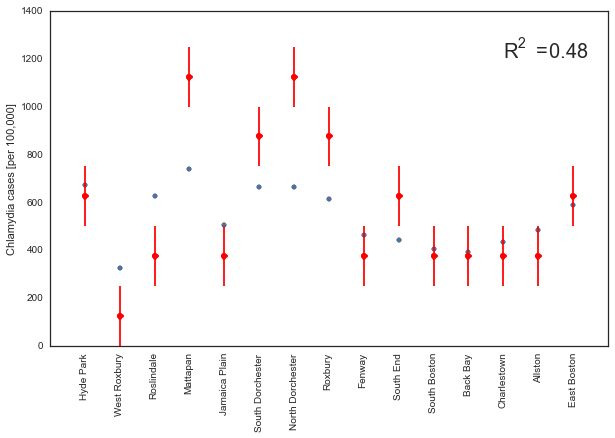

In [27]:
fig = plt.figure(figsize=(10, 6))
data = np.arange(len(df_boston_rates['Neighborhood']))
ax1 = plt.scatter(data,predictions)
#plt.xlabel("Neighborhood")
plt.ylabel("Chlamydia cases [per 100,000]")
ax2 = plt.errorbar(data, df_boston_rates["mean"], yerr=df_boston_rates["error"],fmt='o', color='red')
plt.xlim([-1,15])
plt.ylim([0,1400])

x = np.arange(15)
labels = ['Hyde Park', 'West Roxbury', 'Roslindale', 'Mattapan','Jamaica Plain', 'South Dorchester', 'North Dorchester', 'Roxbury','Fenway', 'South End', 'South Boston', 'Back Bay','Charlestown', 'Allston', 'East Boston']
plt.xticks(x, labels, rotation='vertical')

plt.text(12, 1200, r'$R^2 = $%.2f'%(R2), fontsize=20)

plt.savefig('../graphics/boston_comparison.png', bbox_inches='tight', dpi=150)

# Plots for website

In [28]:
def calculate_rate(Zipcode):
    target = df_zipcode[df_zipcode["geoid2"]==int(Zipcode)]
    target_params = target.values[0]
    chlamydia_rate = model.predict(target_params[1:])*Ystd+Ymean
    return chlamydia_rate

Race = "Black"
Gender = "Male"
Age = "30-34"
Zipcode = "02474"


target_unnormalized = df_zipcode_unnormalized[df_zipcode_unnormalized["geoid2"]==int(Zipcode)]

TOTALNR = target_unnormalized["Population"]

if Gender == "Male":
    gender_table = "hd02s026"
else:
    gender_table = "hd02s051"

GENDERNR = TOTALNR*target_unnormalized[gender_table]/100.0

if Race == "White":
    race_table = "hd02s078"
elif Race == "Black":
    race_table = "hd02s079"
elif Race == "Native":
    race_table = "hd02s080"
elif Race == "Asian":
    race_table = "hd02s081"
elif Race == "Pacific":
    race_table = "hd02s089"
elif Race == "Multiple":
    race_table = "hd02s095"
elif Race == "Hispanic":
    race_table = "hd02s107"

RACENR = TOTALNR*target_unnormalized[race_table]/100.0

if Age == "0-14":
    age_table = "hd02s002"
elif Age == "15-19":
    age_table = "hd02s005"
elif Age == "20-24":
    age_table = "hd02s006"
elif Age == "25-29":
    age_table = "hd02s007"
elif Age == "30-34":
    age_table = "hd02s008"
elif Age == "35-39":
    age_table = "hd02s009"
elif Age == "40-44":
    age_table = "hd02s010"
elif Age == "45-54":
    age_table = "hd02s011"
elif Age == "55-64":
    age_table = "hd02s013"
elif Age == "65+":
    age_table = "hd02s015"

AGENR = TOTALNR*target_unnormalized[age_table]/100.0






zipcoderate = calculate_rate(Zipcode)*100
genderrate = gender_rate[Gender]*100
agerate = age_rate[Age]*100
racerate = race_rate[Race]*100

the_result = (zipcoderate/TOTALNR.values + genderrate/GENDERNR.values + racerate/RACENR.values + agerate/AGENR.values)/(1.0/TOTALNR.values+1.0/GENDERNR.values+1.0/RACENR.values+1.0/AGENR.values)

d = np.array([the_result[0], genderrate, agerate, racerate, zipcoderate[0]])
d_label = np.array(["You", "Your gender", "Your age group", "Your race / ethnicity", "Your location"])
d_label
#index = {"Chlamydia"}
#df_plot = pd.DataFrame(data=d, index=index)
#df_plot

/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['You', 'Your gender', 'Your age group', 'Your race / ethnicity',
       'Your location'], 
      dtype='<U21')

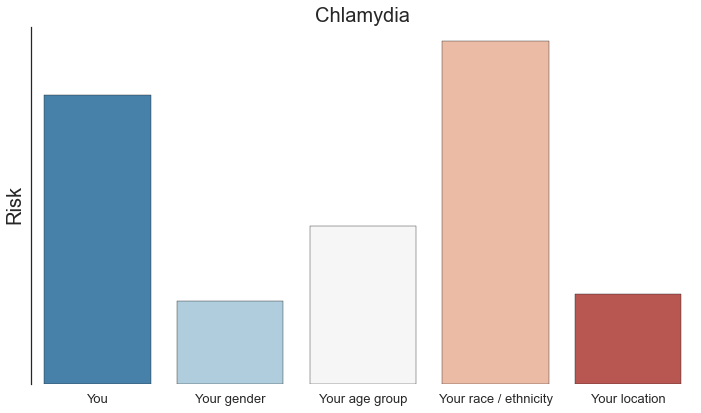

In [30]:
sns.set(style="white", context="talk")

fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=True)

# Center the data to make it diverging
y2 = d # - d.mean()

position = np.arange(len(d))
zipped = zip(position,d)

sns.barplot(d_label, y2, palette="RdBu_r", ax=ax)
#sns.barplot(d_label, y2, color=clrs, ax=ax)

ax.set_ylabel("Risk", fontsize=20)

plt.title(r'Chlamydia', fontsize=20)
ax.plot([-1, len(d)], [0,0], "k-", linewidth=1.0)

# Finalize the plot
sns.despine(bottom=True)
plt.setp(fig.axes, yticks=[])
plt.tight_layout(h_pad=3)